## Decision Trees 

Decision trees are a type of classification algorithm that is based on binary decisision. We can use a simple example to understand how decision trees are build.

For this example to work, you need to install GraphViz (https://graphviz.org/download/) and add it to your path.
You also need to:
```python
!pip install graphviz
```


In [10]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

In [28]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

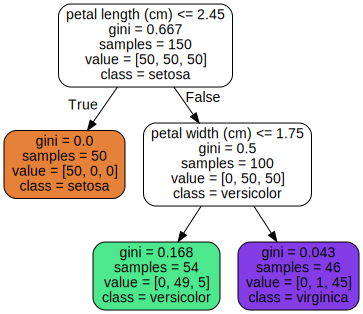

In [15]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os


export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("iris_tree.dot")

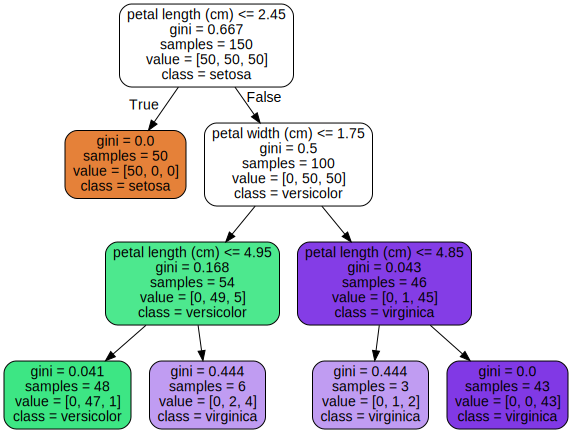

In [17]:
tree_clf_2 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_2.fit(X, y)
export_graphviz(
        tree_clf_2,
        out_file="iris_tree_2.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("iris_tree_2.dot")

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

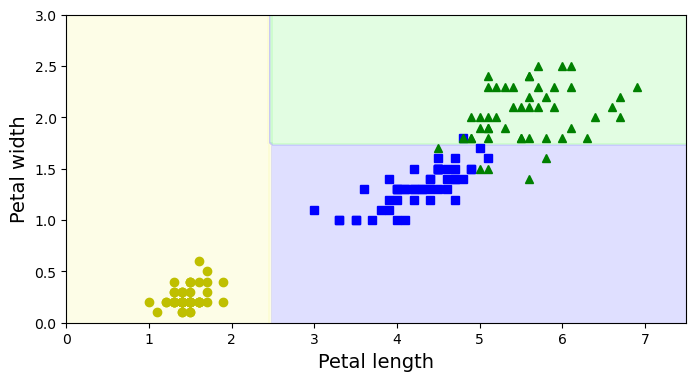

In [29]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.show();

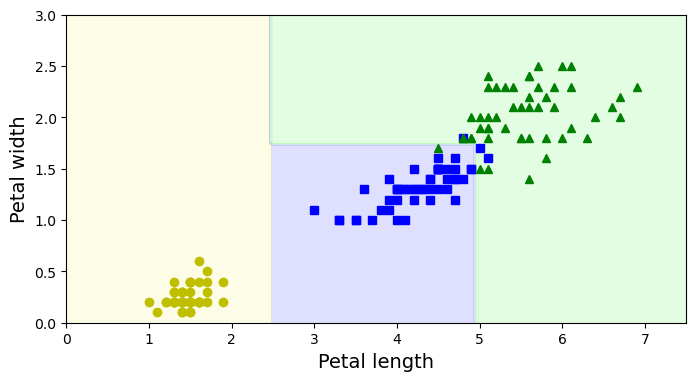

In [30]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_2, X, y)
plt.show();

How do Decision trees work? 

At each node/level, the decision tree looks for the best feature and best thresshold that minimizes the *Gini Impurity*, defined as 
$$
G_{i} = 1 - \sum_{k=1}^{n}p_{i,k}^2
$$
Where $p_{i,k}$ is the ratio of class $k$ instance among the training instances in the node $i$.

<div style="text-align:center">
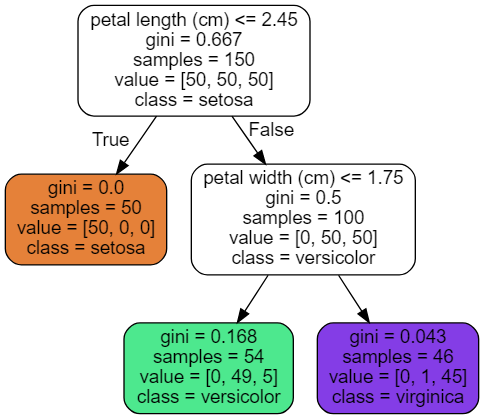
</div>


For the node # 1
$$
G_{1} = 1 -(\frac{50}{150})^2 - (\frac{50}{150})^2 - (\frac{50}{150})^2 = 0.667
$$

For the node # 2 | left (green)
$$
G_{1} = 1 -(\frac{0}{54})^2 - (\frac{49}{54})^2 - (\frac{5}{54})^2 = 0.168
$$


The algorithm to train Decision Tress is a brute force algorithm called *Classification of Regression Trees*, and it simply will grow the tree by making binary decisions. At each decision point, the algorithm will find the best feature ($k$) and the best threshold ($t_k$) that produces the lowest cost function 

$$
L(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}
$$
where $m$ is the total number of samples in the node, $m_{left}$ (right) are the amount of samples that will be assigned to left (rigth) side of the tree, and $G_{left}$ (right) are the resulting *Gini Impurity*.

**The algorithm works one node at the time, so there is no way to know how selections in the current node will affect noder down the tree.**


### Limitations:
Decision Trees can grow up to having a single element per node. When this happend, the model has learned the training data perfectly, but it will produce poor results for the testing/validation data. 
**It is important to always validate your model with testing data**

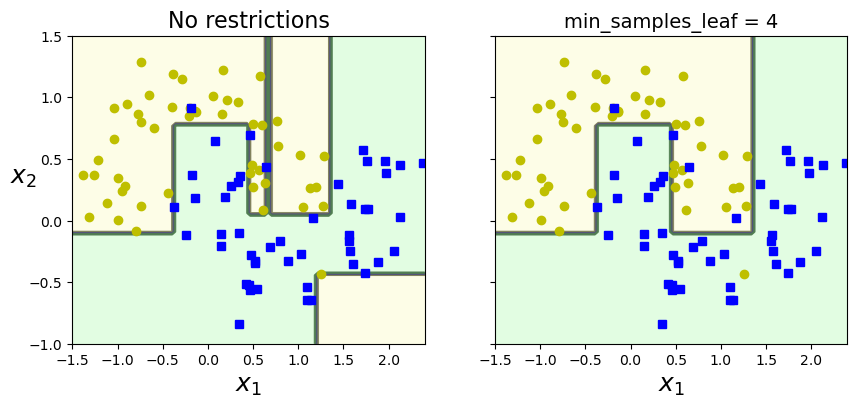

In [48]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier( random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

## Random Forests 

Random Forest refers to a combination of decision trees. To create a randon forest you must create many decision tress and then combine their outputs to obtain a single output. Each tree is created by
- Chosing a random sample of the training data 
- Randomly chossing a few features 

Att the end, a random forests is just a combination of decision trees with randomly selected training data and features. 
<div style="text-align:center">
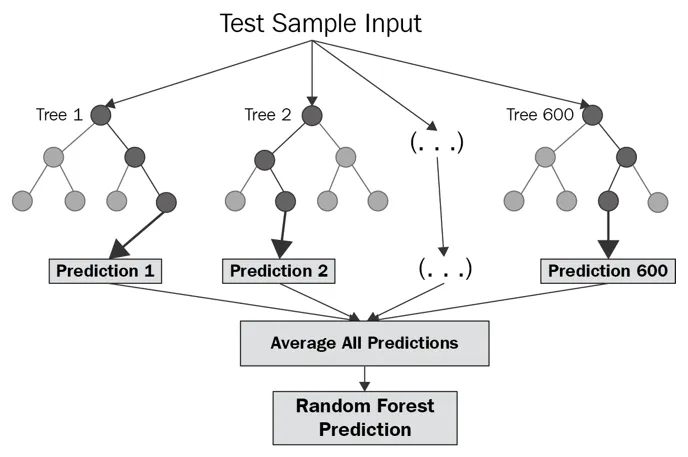
</div>

There is plenty of empirical evidence that suggests that such models are superior to simple Decision Trees. 

**Note that you can make a *Random Forests* with any classifier** 

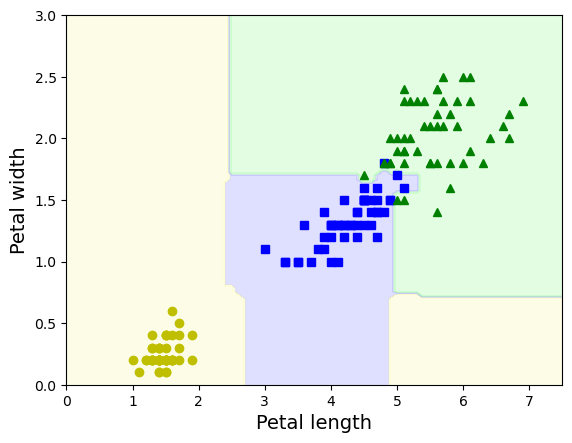

In [62]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
X = iris.data[:, 2:] # petal length and width
y = iris.target
rnd_clf.fit(X,y)
#rnd_clf.predict(X)
plot_decision_boundary(rnd_clf, X, y)
plt.show()

## Feature Importance 

Random Forest provide a simple approach to identify what are the most important features for classification. Because not all decision tress in the forests use the same feautures, it is easy to identify which features are important and its order


In [63]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682
